In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
pip install pandas numpy tensorflow scikit-learn

In [ ]:
import os
import glob
import pandas as pd

# 디렉토리 경로 설정
directory_path = '/content/drive/MyDrive/Colab Notebooks/dataset/propis_dataset/'

# 파일 패턴 설정
file_pattern = '*_data_preprocessor.csv'

# 디렉토리 내의 파일 목록 얻기
file_list = glob.glob(os.path.join(directory_path, file_pattern))

# 파일들을 저장할 빈 DataFrame 생성
combined_data = pd.DataFrame()

# 각 파일을 순회하며 DataFrame에 추가
for file_path in file_list:
    df = pd.read_csv(file_path, encoding='cp949')
    combined_data = combined_data.append(df, ignore_index=True)

# 결측치를 0으로 채우기
combined_data.fillna(0, inplace=True)


# 결과 확인
print(combined_data.head())

           일시  평균기온(°C)  최저기온(°C)  최고기온(°C)  일강수량(mm)  최소 상대습도(%)
0  2000-01-01       5.5       1.8       9.9       0.0        46.0
1  2000-01-02       4.2      -0.9       6.9       6.0        57.0
2  2000-01-03      -2.2      -4.6       0.1       0.0        35.0
3  2000-01-04       0.3      -4.3       4.3       0.0        30.0
4  2000-01-05       2.8       0.1       4.6      18.4        44.0


<ipython-input-14-bb4457c731c0>:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_data = combined_data.append(df, ignore_index=True)
<ipython-input-14-bb4457c731c0>:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_data = combined_data.append(df, ignore_index=True)
<ipython-input-14-bb4457c731c0>:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_data = combined_data.append(df, ignore_index=True)
<ipython-input-14-bb4457c731c0>:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_data = combined_data.append(df, ignore_index=True)
<ipython-input-14-bb4457c731c0>:20: FutureWarning: The frame.append method i

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam

# 여러 파일을 하나로 합치기
all_data = pd.DataFrame()

for year in range(2000, 2020):
    file_path = '/content/drive/MyDrive/Colab Notebooks/dataset/propis_dataset/' + f'{year}_data_preprocessor.csv'
    data = pd.read_csv(file_path, encoding='cp949')

    # 결측치 처리
    data['일강수량(mm)'].fillna(0, inplace=True)

    all_data = pd.concat([all_data, data])

# 날짜 컬럼을 datetime 형식으로 변환
all_data['일시'] = pd.to_datetime(all_data['일시'])

# 평균기온을 예측하기 위한 데이터 준비
features = all_data[['평균기온(°C)', '최저기온(°C)', '최고기온(°C)', '일강수량(mm)', '최소 상대습도(%)']]
target = all_data['평균기온(°C)']

# 데이터를 학습용과 테스트용으로 나눔
train_size = int(len(features) * 0.8)
train_features, test_features = features[:train_size], features[train_size:]
train_target, test_target = target[:train_size], target[train_size:]

# 데이터 스케일링
scaler = MinMaxScaler()
train_features_scaled = scaler.fit_transform(train_features)
test_features_scaled = scaler.transform(test_features)

# LSTM 모델 생성
model = Sequential()
model.add(LSTM(units=50, activation='tanh', input_shape=(train_features_scaled.shape[1], 1)))
model.add(Dense(units=1))
model.compile(optimizer=Adam(), loss='mean_squared_error')

# 데이터를 LSTM에 맞게 reshape
X_train = np.reshape(train_features_scaled, (train_features_scaled.shape[0], train_features_scaled.shape[1], 1))
X_test = np.reshape(test_features_scaled, (test_features_scaled.shape[0], test_features_scaled.shape[1], 1))

# 모델 학습
model.fit(X_train, train_target, epochs=50, batch_size=32)

# 테스트 데이터에 대한 예측
predictions = model.predict(X_test)

# 예측 결과 시각화 등 추가 작업 수행 가능

# 모델 저장 (필요에 따라)
model.save('model_combined.h5')


Epoch 1/50
183/183 [==============================] - 5s 5ms/step - loss: 120.0900
Epoch 2/50
183/183 [==============================] - 1s 5ms/step - loss: 11.5330
Epoch 3/50
183/183 [==============================] - 1s 5ms/step - loss: 4.2803
Epoch 4/50
183/183 [==============================] - 1s 5ms/step - loss: 2.0300
Epoch 5/50
183/183 [==============================] - 1s 5ms/step - loss: 1.1354
Epoch 6/50
183/183 [==============================] - 1s 5ms/step - loss: 0.6510
Epoch 7/50
183/183 [==============================] - 1s 5ms/step - loss: 0.4584
Epoch 8/50
183/183 [==============================] - 1s 5ms/step - loss: 0.3603
Epoch 9/50
183/183 [==============================] - 1s 5ms/step - loss: 0.3014
Epoch 10/50
183/183 [==============================] - 1s 5ms/step - loss: 0.2676
Epoch 11/50
183/183 [==============================] - 1s 5ms/step - loss: 0.2362
Epoch 12/50
183/183 [==============================] - 1s 8ms/step - loss: 0.2163
Epoch 13/50
183/183 [=

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
print(f"Length of test_target: {len(test_target)}")
print(f"Length of predictions: {len(predictions)}")

Length of test_target: 1461
Length of predictions: 1461


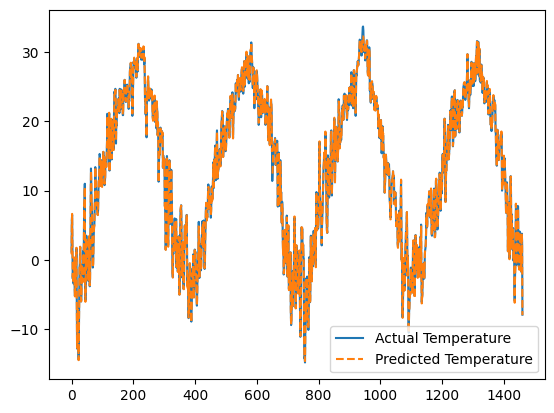

In [ ]:
import matplotlib.pyplot as plt

# 예측 결과 시각화
plt.plot(test_target.values, label='Actual Temperature')
plt.plot(predictions, label='Predicted Temperature', linestyle='dashed')
plt.legend()
plt.show()


In [ ]:
# NaN 값을 제거하고 NumPy 배열로 변환
test_target_array = np.array(test_target.dropna())
predictions_array = np.array(predictions.flatten())

# NaN 값이 있는 인덱스 제거
nan_indices = np.isnan(test_target_array) | np.isnan(predictions_array)
test_target_array = test_target_array[~nan_indices]
predictions_array = predictions_array[~nan_indices]

# MSE 및 MAE 계산
mse = mean_squared_error(test_target_array, predictions_array)
mae = mean_absolute_error(test_target_array, predictions_array)

print(f"MSE: {mse}")
print(f"MAE: {mae}")

MSE: 0.03974418296376354
MAE: 0.1561763492491964


In [ ]:
# 오차율 계산
error_rate = ((test_target_non_zero - predictions_non_zero) / test_target_non_zero) * 100

# NaN 값 및 무한대 값 제거
error_rate = error_rate[~np.isnan(error_rate) & ~np.isinf(error_rate)]

# 오차율 평균 계산
mean_error_rate = np.mean(np.abs(error_rate))  # 절대값으로 변환

print(f"평균 오차율: {mean_error_rate:.2f}%")



평균 오차율: 4.75%


In [ ]:
max_error_data = all_data.iloc[max_error_data_index]
print("가장 큰 오차가 발생한 데이터:")
print(max_error_data)


가장 큰 오차가 발생한 데이터:
일시            2003-01-23 00:00:00
평균기온(°C)                     -1.3
최저기온(°C)                     -4.3
최고기온(°C)                      3.1
일강수량(mm)                      0.0
최소 상대습도(%)                   44.0
Name: 22, dtype: object


Epoch 1/50
9/9 [==============================] - 2s 8ms/step - loss: 0.2159
Epoch 2/50
9/9 [==============================] - 0s 7ms/step - loss: 0.0852
Epoch 3/50
9/9 [==============================] - 0s 7ms/step - loss: 0.0755
Epoch 4/50
9/9 [==============================] - 0s 7ms/step - loss: 0.0739
Epoch 5/50
9/9 [==============================] - 0s 8ms/step - loss: 0.0713
Epoch 6/50
9/9 [==============================] - 0s 9ms/step - loss: 0.0710
Epoch 7/50
9/9 [==============================] - 0s 8ms/step - loss: 0.0704
Epoch 8/50
9/9 [==============================] - 0s 8ms/step - loss: 0.0702
Epoch 9/50
9/9 [==============================] - 0s 7ms/step - loss: 0.0700
Epoch 10/50
9/9 [==============================] - 0s 7ms/step - loss: 0.0699
Epoch 11/50
9/9 [==============================] - 0s 7ms/step - loss: 0.0699
Epoch 12/50
9/9 [==============================] - 0s 9ms/step - loss: 0.0698
Epoch 13/50
9/9 [==============================] - 0s 7ms/step - loss: 0.

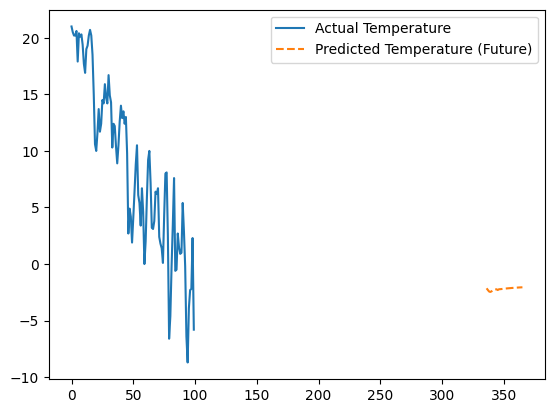

Epoch 1/50
9/9 [==============================] - 3s 13ms/step - loss: 0.1501
Epoch 2/50
9/9 [==============================] - 0s 9ms/step - loss: 0.0967
Epoch 3/50
9/9 [==============================] - 0s 9ms/step - loss: 0.0820
Epoch 4/50
9/9 [==============================] - 0s 8ms/step - loss: 0.0830
Epoch 5/50
9/9 [==============================] - 0s 8ms/step - loss: 0.0807
Epoch 6/50
9/9 [==============================] - 0s 8ms/step - loss: 0.0806
Epoch 7/50
9/9 [==============================] - 0s 8ms/step - loss: 0.0805
Epoch 8/50
9/9 [==============================] - 0s 7ms/step - loss: 0.0803
Epoch 9/50
9/9 [==============================] - 0s 7ms/step - loss: 0.0803
Epoch 10/50
9/9 [==============================] - 0s 9ms/step - loss: 0.0802
Epoch 11/50
9/9 [==============================] - 0s 7ms/step - loss: 0.0803
Epoch 12/50
9/9 [==============================] - 0s 9ms/step - loss: 0.0802
Epoch 13/50
9/9 [==============================] - 0s 7ms/step - loss: 0

KeyboardInterrupt: ignored

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam

# create_sequences 함수 정의
def create_sequences(data, n_steps):
    X, y = [], []
    for i in range(len(data) - n_steps):
        seq_x = data[i:i + n_steps]
        seq_y = data[i + n_steps]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

# 파일들의 리스트 생성
file_paths = [f'/content/drive/MyDrive/Colab Notebooks/dataset/propis_dataset/{year}_data_preprocessor.csv' for year in range(2000, 2020)]

# 모든 데이터를 담을 데이터프레임
all_data = pd.DataFrame()

# 파일들을 읽어와서 데이터를 합치기
for file_path in file_paths:
    data = pd.read_csv(file_path, encoding='cp949')
    # 결측치 처리
    data['일강수량(mm)'].fillna(0, inplace=True)

    # 날짜 컬럼을 datetime 형식으로 변환
    data['일시'] = pd.to_datetime(data['일시'])

    # 평균기온을 예측하기 위한 데이터 준비
    features = data[['평균기온(°C)', '최저기온(°C)', '최고기온(°C)', '일강수량(mm)', '최소 상대습도(%)']]
    target = data['평균기온(°C)']

    # 데이터 스케일링
    scaler = MinMaxScaler()
    features_scaled = scaler.fit_transform(features)

    # 시계열 데이터를 모델 입력 형식으로 변환
    n_steps = 10
    X, y = create_sequences(features_scaled, n_steps)

    # 학습용과 테스트용으로 데이터를 나눔
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # LSTM 모델 생성
    model = Sequential()
    model.add(LSTM(units=50, activation='tanh', input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dense(units=1))
    model.compile(optimizer=Adam(), loss='mean_squared_error')

    # 모델 학습
    model.fit(X_train, y_train, epochs=50, batch_size=32)

    # 테스트 데이터에 대한 예측
    y_pred = model.predict(X_test)

    # 미래 100일치를 예측하기 위한 데이터 준비
    n_future = 30  # 수정된 부분
    last_30_days = features_scaled[-n_steps:]
    future_data = np.zeros((n_future, features_scaled.shape[1]))

    for i in range(n_future):
      future_pred = model.predict(np.reshape(last_30_days, (1, n_steps, features_scaled.shape[1])))

    # future_pred를 2차원 배열로 변환
      future_pred = np.atleast_2d(future_pred)

    # future_pred의 shape이 (1, 1)이면 (1, 5)로 확장
      if future_pred.shape == (1, 1):
        future_pred = np.repeat(future_pred, features_scaled.shape[1], axis=1)

      future_data[i, 0] = future_pred[0, 0]
    # 나머지 특성은 예측된 값을 사용
      future_data[i, 1:] = future_pred[0, 1:]
    # 다음 예측을 위해 last_30_days 갱신
      last_30_days = np.concatenate((last_30_days[1:, :], np.reshape(future_pred, (1, features_scaled.shape[1]))))


    # 스케일링 역변환
    future_data = scaler.inverse_transform(future_data)

    # 예측 결과 시각화
    import matplotlib.pyplot as plt

    plt.plot(target.values[-100:], label='Actual Temperature')
    plt.plot(np.arange(len(target)-n_future, len(target)), future_data[:, 0], label='Predicted Temperature (Future)', linestyle='dashed')
    plt.legend()
    plt.show()



1/1 [==============================] - 0s 22ms/step


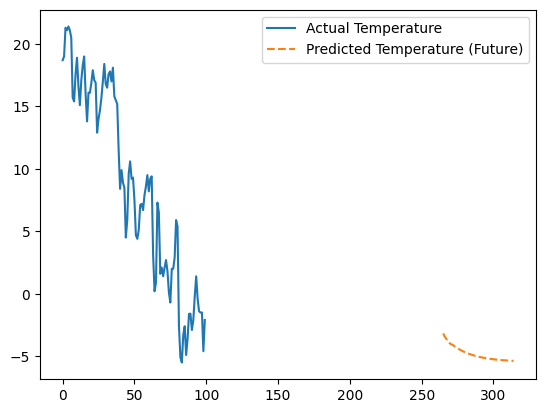

In [ ]:
# 미래 100일치를 예측하기 위한 데이터 준비
n_future = 50  # 수정된 부분
last_30_days = features_scaled[-n_steps:]

# 미래 데이터를 저장할 배열
future_data = np.zeros((n_future, features_scaled.shape[1]))

for i in range(n_future):
    # 현재 예측
    future_pred = model.predict(np.reshape(last_30_days, (1, n_steps, features_scaled.shape[1])))

    # future_pred를 2차원 배열로 변환
    future_pred = np.atleast_2d(future_pred)

    # future_pred의 shape이 (1, 1)이면 (1, 5)로 확장
    if future_pred.shape == (1, 1):
        future_pred = np.repeat(future_pred, features_scaled.shape[1], axis=1)

    # future_data 배열에 예측 결과 추가
    future_data[i, 0] = future_pred[0, 0]
    future_data[i, 1:] = future_pred[0, 1:]

    # 다음 예측을 위해 last_30_days 갱신
    last_30_days = np.concatenate((last_30_days[1:, :], np.reshape(future_pred, (1, features_scaled.shape[1]))))

# 스케일링 역변환
future_data = scaler.inverse_transform(future_data)

# 예측 결과 시각화
import matplotlib.pyplot as plt

# 실제 데이터 플로팅
plt.plot(target.values[-100:], label='Actual Temperature')

# 예측 데이터 플로팅
plt.plot(np.arange(len(target) - 100, len(target) + n_future - 100), future_data[:, 0], label='Predicted Temperature (Future)', linestyle='dashed')

plt.legend()
plt.show()

1/1 [==============================] - 0s 20ms/step


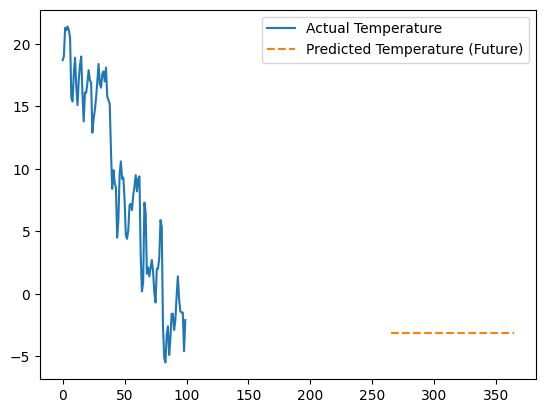

In [ ]:
# 미래 100일치를 예측하기 위한 데이터 준비
n_future = 100  # 수정된 부분
last_30_days = features_scaled[-n_steps:]

# 미래 데이터를 저장할 배열
future_data = np.zeros((n_future, features_scaled.shape[1]))

for i in range(n_future):
    # 현재 예측
    future_pred = model.predict(np.reshape(last_30_days, (1, n_steps, features_scaled.shape[1])))

    # future_pred를 2차원 배열로 변환
    future_pred = np.atleast_2d(future_pred)

    # future_pred의 shape이 (1, 1)이면 (1, 5)로 확장
    if future_pred.shape == (1, 1):
        future_pred = np.repeat(future_pred, features_scaled.shape[1], axis=1)

    # future_data 배열에 예측 결과 추가
    future_data[i, 0] = future_pred[0, 0]
    future_data[i, 1:] = future_pred[0, 1:]

    # 다음 예측을 위해 last_30_days 초기화
    last_30_days = features_scaled[-n_steps:]

# 스케일링 역변환
future_data = scaler.inverse_transform(future_data)

# 예측 결과 시각화
import matplotlib.pyplot as plt

# 실제 데이터 플로팅
plt.plot(target.values[-100:], label='Actual Temperature')

# 예측 데이터 플로팅
plt.plot(np.arange(len(target) - 100, len(target) + n_future - 100), future_data[:, 0], label='Predicted Temperature (Future)', linestyle='dashed')

plt.legend()
plt.show()